In [4]:
import pandas as pd

df = pd.read_csv("../datasets/processed_data/encoded_cleaned_recruitment_data.csv")

categorical_cols = ['Gender', 'EducationLevel', 'RecruitmentStrategy']

df.drop(columns=['Gender_encoded', 'EducationLevel_encoded', 'RecruitmentStrategy_encoded'],
        inplace=True)

In [5]:
def get_subset_df(df, column_name, column_value):
    return  df[df[column_name] == column_value]

def analyze_subset_distribution(df, column_name, column_value):


    subset = get_subset_df(df, column_name, column_value)
    n = len(subset)
    print(f"There are  {n} records that satisfy {column_name} == {column_value}\n")

    if n == 0:
        print("")
        return
    

    for col in df.columns:

        if col == column_name:
            continue
        
        print(f"—— anaylzing columns：{col} ——")

        if 'HiringDecision' == col:
            counts = subset[col].value_counts().to_dict()
            count_1 = counts.get(1, 0)
            count_0 = counts.get(0, 0)
            prob_1 = count_1 / n
            prob_0 = count_0 / n
            print(f"  1 → count: {count_1}, probability: {prob_1:.2%}")
            print(f"  0 → count: {count_0}, probability: {prob_0:.2%}")

        elif pd.api.types.is_numeric_dtype(df[col]):
            stats = subset[col].describe().round(2)
            print(stats.to_string())

        else:
            counts = subset[col].value_counts()
            freqs = subset[col].value_counts(normalize=True).mul(100).round(2)
            result = pd.DataFrame({
                'count': counts,
                'percent': freqs.astype(str) + '%'
            })
            print(result.to_string())
        print()  


In [6]:
analyze_subset_distribution(df, "Gender", "Male")




There are  738 records that satisfy Gender == Male

—— anaylsing columns：Unnamed: 0 ——
count     738.00
mean      757.04
std       431.53
min         0.00
25%       375.50
50%       780.50
75%      1130.50
max      1499.00

—— anaylsing columns：Age ——
count    738.00
mean      35.25
std        9.38
min       20.00
25%       27.00
50%       36.00
75%       44.00
max       50.00

—— anaylsing columns：EducationLevel ——
                count percent
EducationLevel               
Bachelor          363  49.19%
Master            164  22.22%
High School       147  19.92%
PhD                64   8.67%

—— anaylsing columns：ExperienceYears ——
count    738.00
mean       7.56
std        4.59
min        0.00
25%        4.00
50%        8.00
75%       12.00
max       15.00

—— anaylsing columns：PreviousCompanies ——
count    738.00
mean       2.91
std        1.41
min        1.00
25%        2.00
50%        3.00
75%        4.00
max        5.00

—— anaylsing columns：DistanceFromCompany ——
count    738.00

## Feature Importances (Jenny)

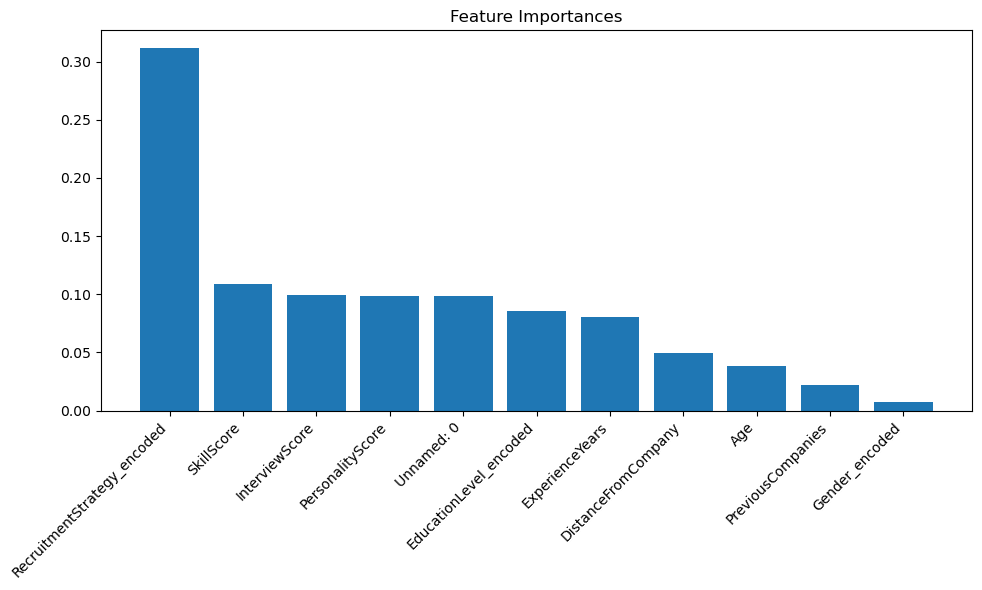

<Figure size 640x480 with 0 Axes>

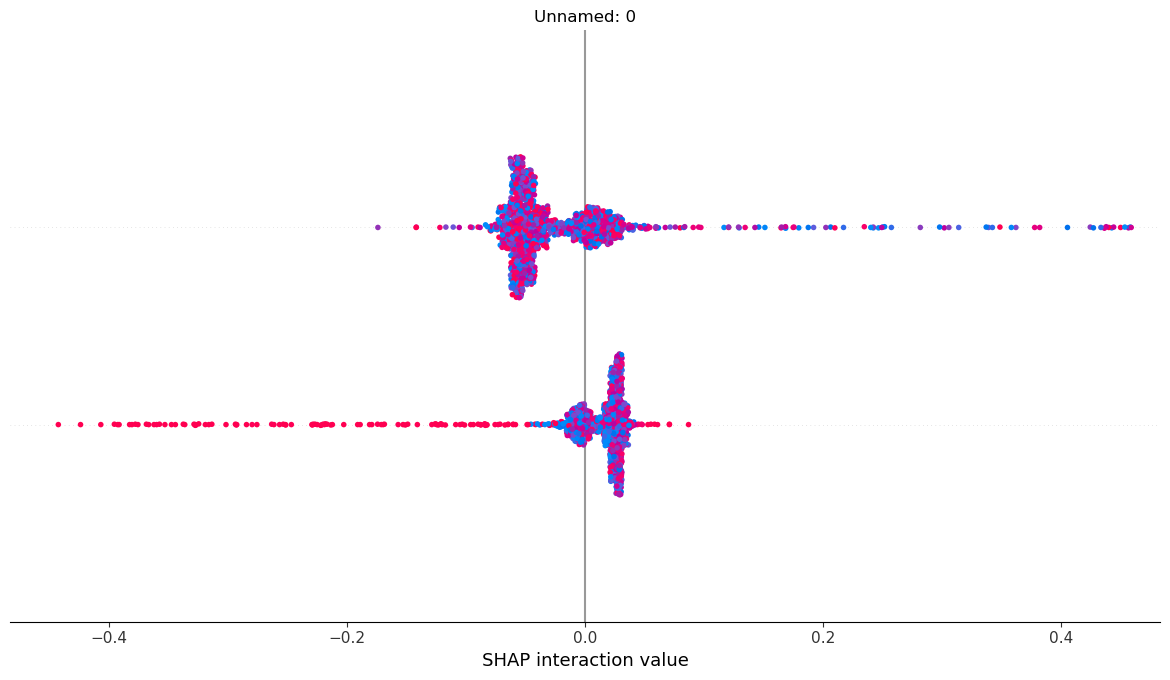

In [10]:
import pandas as pd

df = pd.read_csv('../datasets/processed_data/encoded_cleaned_recruitment_data.csv')
df = df.drop(columns=['Gender', 'EducationLevel', 'RecruitmentStrategy'])  # drop string cols

X = df.drop(columns=['HiringDecision'])  
y = df['HiringDecision']                

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Summary plot (most useful!)
shap.summary_plot(shap_values, X)